In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bankopt-targeted-marketing-analysis/bank-full.csv


# **BankOpt: TARGETED MARKETING ANALYSIS**

<img src = "https://img.freepik.com/premium-vector/online-banking-technology-concept-illustration-bank-electric-circuit-lines-background_387612-43.jpg" align = "middle" height = 450 width = 750>

### **The following topics are covered in this project:**
* Description of Dataset
* Objective
* Data Importing and Understanding
* Data Preprocessing
* Exploratory Analysis and Visualization
* Asking and answering interesting questions
* Summarizing inferences and drawing conclusions

# **Description of Dataset**

* **age**: Age of the client.

* **job**: Type of job the client holds.

* **marital**: Marital status of the client.

* **education**: Client's education level.

* **default**: Indicates if the client has credit in default.

* **balance**: Average yearly balance of the client, in euros.

* **housing**: Indicates if the client has a housing loan.

* **loan**: Indicates if the client has a personal loan.

* **contact**: Type of communication mode used for contact.

* **day**: Day of the last contact.

* **month**: Month of the last contact.

* **duration**: Duration of the last contact in seconds.

* **campaign**: Number of contacts performed during this campaign.

* **pdays**: Days since the client was last contacted from a previous campaign (999 indicates the client was not contacted).

* **previous**: Number of contacts before this campaign.

* **outcome**: Outcome of the previous marketing campaign.

* **y**: Indicates if the client subscribed to a term deposit.


# **Objective**

* **What is the problem?**

  How can a bank increase the success rate of its term deposit subscription through targeted marketing     strategies based on the profiles of its clients?

* **Why is it important to solve it?**

  Subscriptions to term deposits represent a significant revenue stream for banks. By understanding the   profiles of clients who are more likely to subscribe, banks can tailor their marketing strategies,       reduce costs, and increase their profitability.


# **Data Importing and Understanding**

In [2]:
df = pd.read_csv("/kaggle/input/bankopt-targeted-marketing-analysis/bank-full.csv", delimiter=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.shape

(45211, 17)

# **Data Preprocessing**

In [9]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [10]:
df.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [11]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [12]:
df.default.value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [13]:
df.housing.value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [14]:
df.loan.value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [15]:
df.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [16]:
df.poutcome.value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

# **Exploratory Analysis and Visualization**

In [17]:
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# **Task**

1.  What is the age distribution of clients?
2. How does the term deposit subscription rate vary across different job types?
3. How does having a personal loan or housing loan affect the likelihood of subscribing to a term deposit?
4. Is there a trend between education levels and term deposit subscriptions?
5. Does the outcome of the previous campaign correlate with current subscriptions?
6. Which method of contact leads to the highest subscription rates?
7. In which month are clients most likely to subscribe?
8. Is there an optimal number of contacts for a client to maximize subscription likelihood?
9. How does having a credit in default affect the likelihood of subscribing?
10. Does the duration of the last contact have an impact on the subscription?
11. Which combination of job type and education level has the highest subscription rate?
12. Does the success rate increase if a client is contacted more than once in previous campaigns?
13. Can economic indicators (like balance) be used to segment clients for targeted marketing?
14. Is there a specific duration range of contact that leads to the highest success rates?
15. Can we create a comprehensive profile of an "ideal" client most likely to subscribe based on the data?


### **1. What is the age distribution of clients?**

<function matplotlib.pyplot.show(close=None, block=None)>

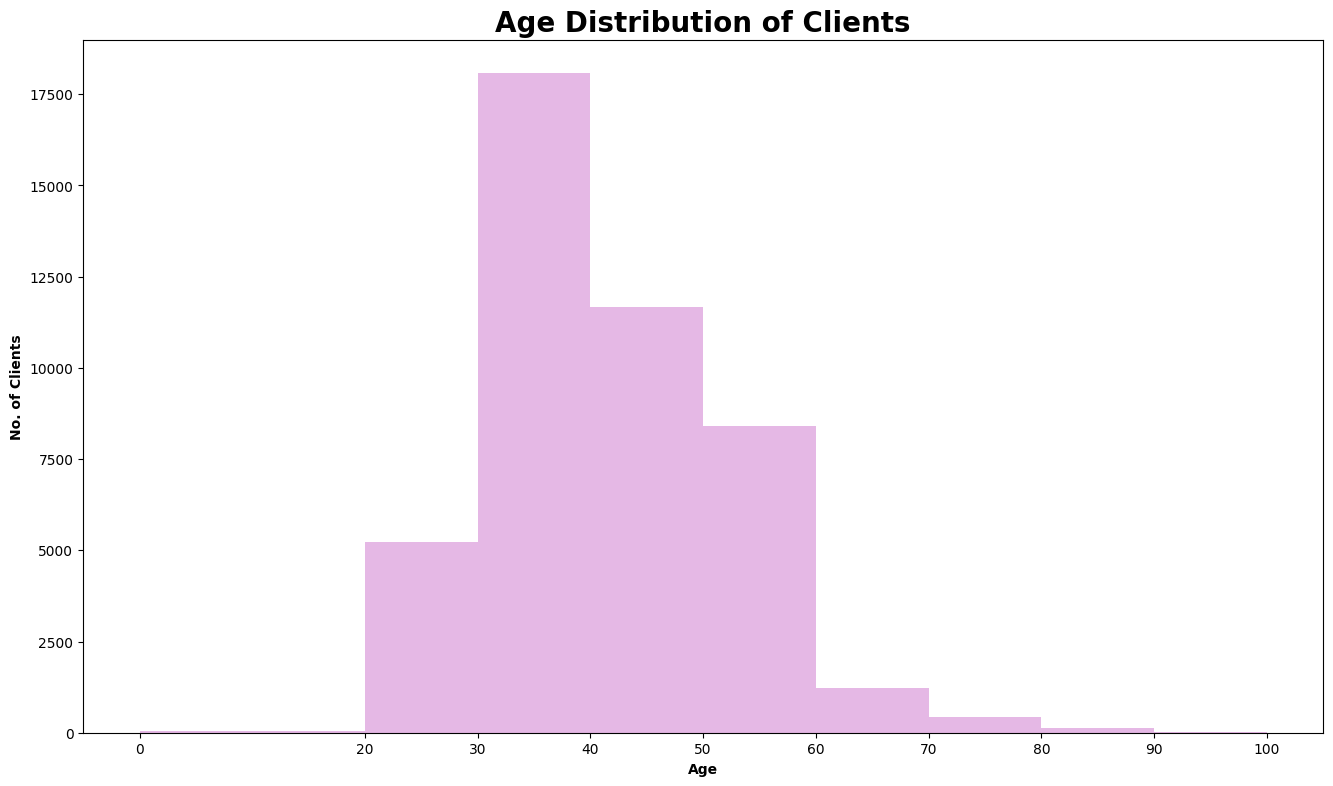

In [18]:
fig = plt.figure(figsize = (16,9))
bins = [0,20,30,40,50,60,70,80,90,100]
plt.hist(df['age'],bins, histtype='bar', color = 'plum', alpha=0.75)
plt.title('Age Distribution of Clients',fontsize=20,fontweight = "bold")
plt.xticks([0,20,30,40,50,60,70,80,90,100])
plt.xlabel('Age',fontweight = "bold")
plt.ylabel('No. of Clients',fontweight = "bold")
plt.show

### **2. How does the term deposit subscription rate vary across different job types?**

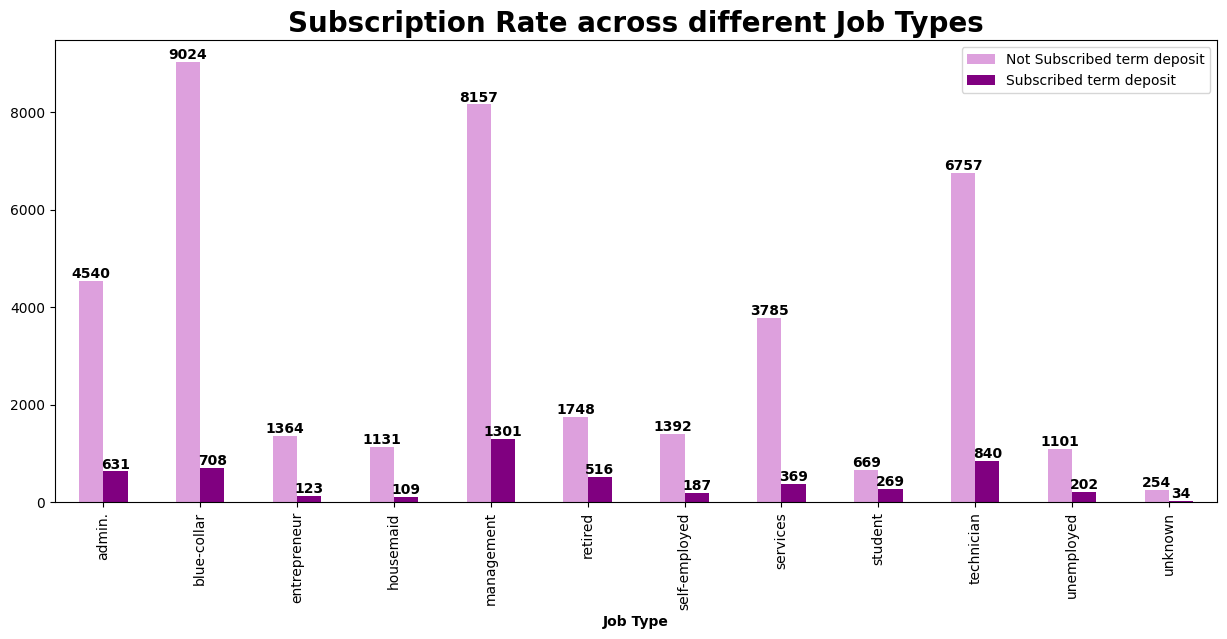

In [19]:
a = pd.crosstab(df.job,df.y).plot(kind="bar",figsize=(15,6),color=['plum','purple' ])
plt.title('Subscription Rate across different Job Types',fontsize=20,fontweight = "bold")
plt.xlabel('Job Type',fontweight = "bold")
plt.legend(['Not Subscribed term deposit','Subscribed term deposit'])
plt.bar_label(a.containers[0],fontweight = "bold")
plt.bar_label(a.containers[1],fontweight = "bold")
plt.show()

### **3. How does having a personal loan or housing loan affect the likelihood of subscribing to a term deposit?**

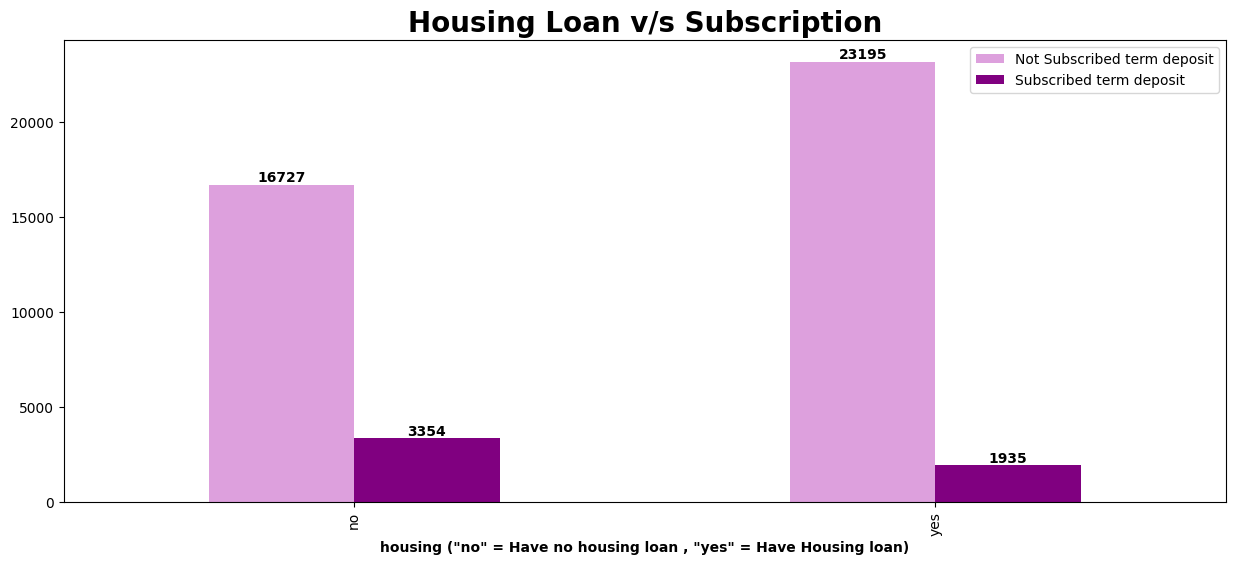

In [20]:
b = pd.crosstab(df.housing,df.y).plot(kind="bar",figsize=(15,6),color=['plum','purple' ])
plt.title('Housing Loan v/s Subscription',fontsize=20,fontweight = "bold")
plt.xlabel('housing ("no" = Have no housing loan , "yes" = Have Housing loan)',fontweight = "bold")
plt.legend(['Not Subscribed term deposit','Subscribed term deposit'])
plt.bar_label(b.containers[0],fontweight = "bold")
plt.bar_label(b.containers[1],fontweight = "bold")
plt.show()

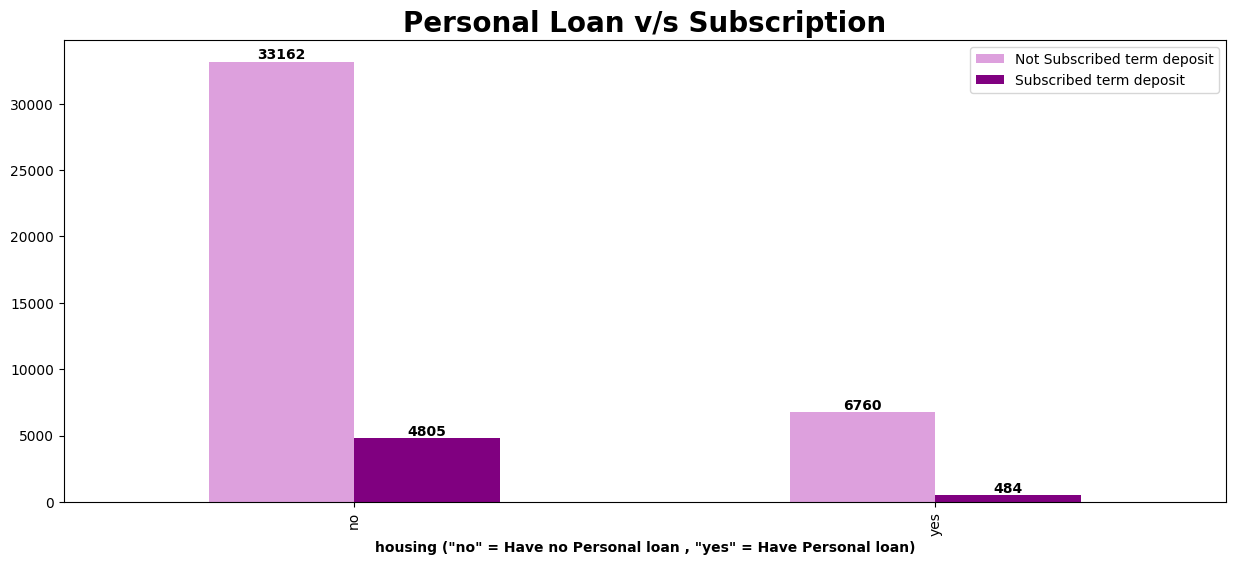

In [21]:
c = pd.crosstab(df.loan,df.y).plot(kind="bar",figsize=(15,6),color=['plum','purple' ])
plt.title('Personal Loan v/s Subscription',fontsize=20,fontweight = "bold")
plt.xlabel('housing ("no" = Have no Personal loan , "yes" = Have Personal loan)',fontweight = "bold")
plt.legend(['Not Subscribed term deposit','Subscribed term deposit'])
plt.bar_label(c.containers[0],fontweight = "bold")
plt.bar_label(c.containers[1],fontweight = "bold")
plt.show()

### **4. Is there a trend between education levels and term deposit subscriptions?**

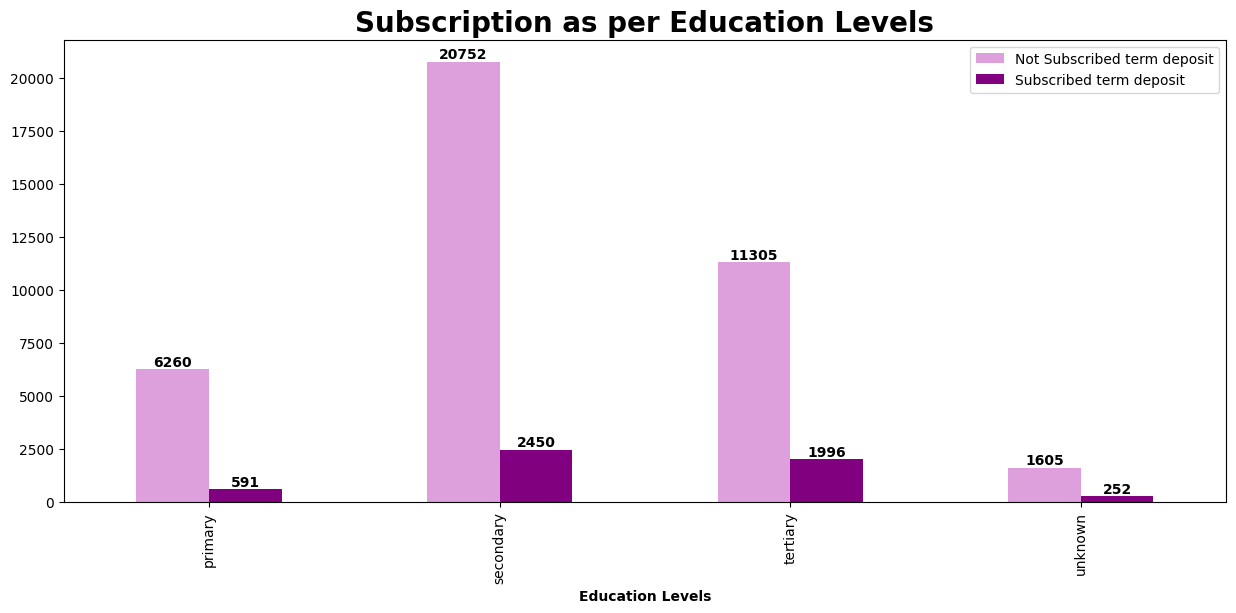

In [22]:
d = pd.crosstab(df.education,df.y).plot(kind="bar",figsize=(15,6),color=['plum','purple' ])
plt.title('Subscription as per Education Levels',fontsize=20,fontweight = "bold")
plt.xlabel('Education Levels',fontweight = "bold")
plt.legend(['Not Subscribed term deposit','Subscribed term deposit'])
plt.bar_label(d.containers[0],fontweight = "bold")
plt.bar_label(d.containers[1],fontweight = "bold")
plt.show()

### **5. Does the outcome of the previous campaign correlate with current subscriptions?**

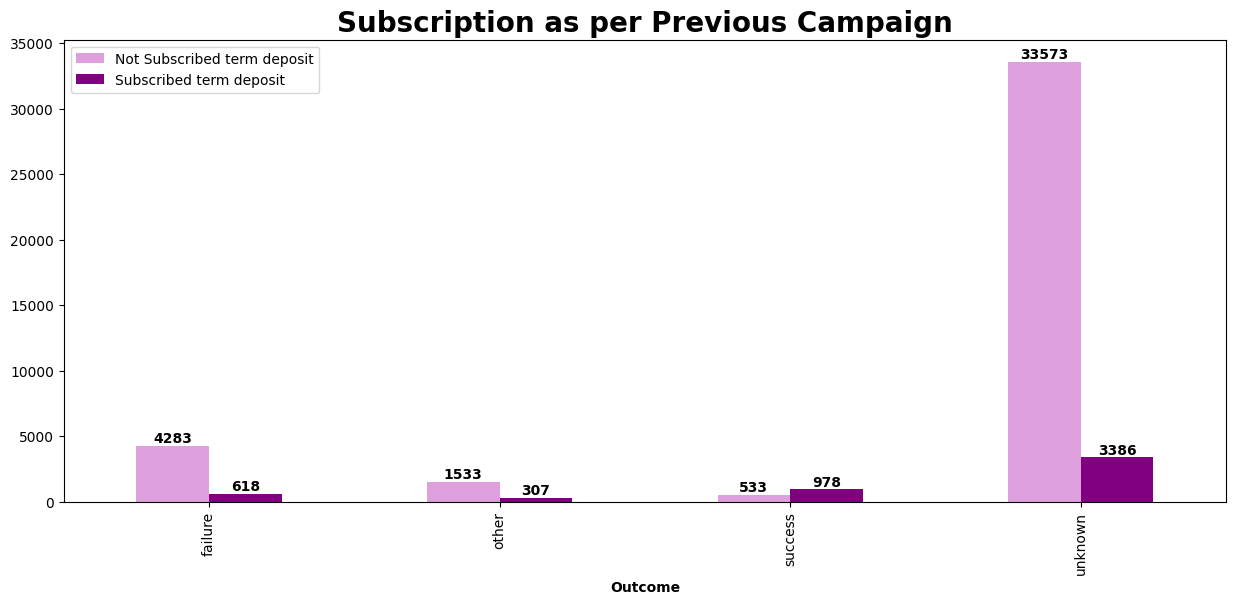

In [23]:
e = pd.crosstab(df.poutcome,df.y).plot(kind="bar",figsize=(15,6),color=['plum','purple' ])
plt.title('Subscription as per Previous Campaign',fontsize=20,fontweight = "bold")
plt.xlabel('Outcome',fontweight = "bold")
plt.legend(['Not Subscribed term deposit','Subscribed term deposit'])
plt.bar_label(e.containers[0],fontweight = "bold")
plt.bar_label(e.containers[1],fontweight = "bold")
plt.show()

### **6. Which method of contact leads to the highest subscription rates?**

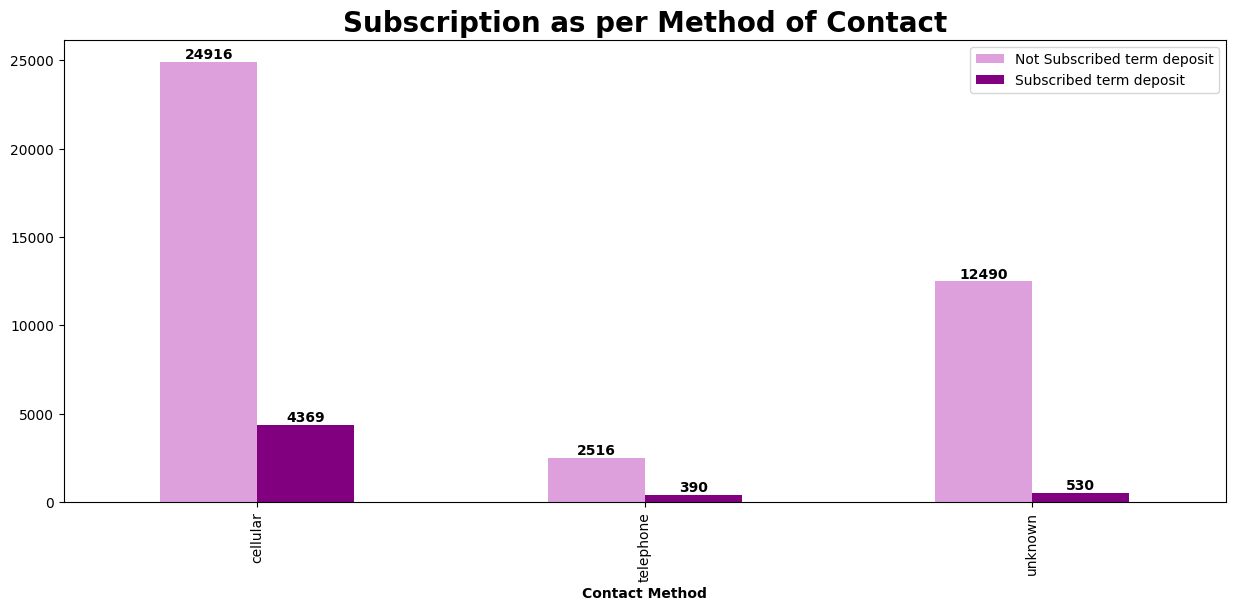

In [24]:
f = pd.crosstab(df.contact,df.y).plot(kind="bar",figsize=(15,6),color=['plum','purple' ])
plt.title('Subscription as per Method of Contact',fontsize=20,fontweight = "bold")
plt.xlabel('Contact Method',fontweight = "bold")
plt.legend(['Not Subscribed term deposit','Subscribed term deposit'])
plt.bar_label(f.containers[0],fontweight = "bold")
plt.bar_label(f.containers[1],fontweight = "bold")
plt.show()

### **7. In which month are clients most likely to subscribe?**

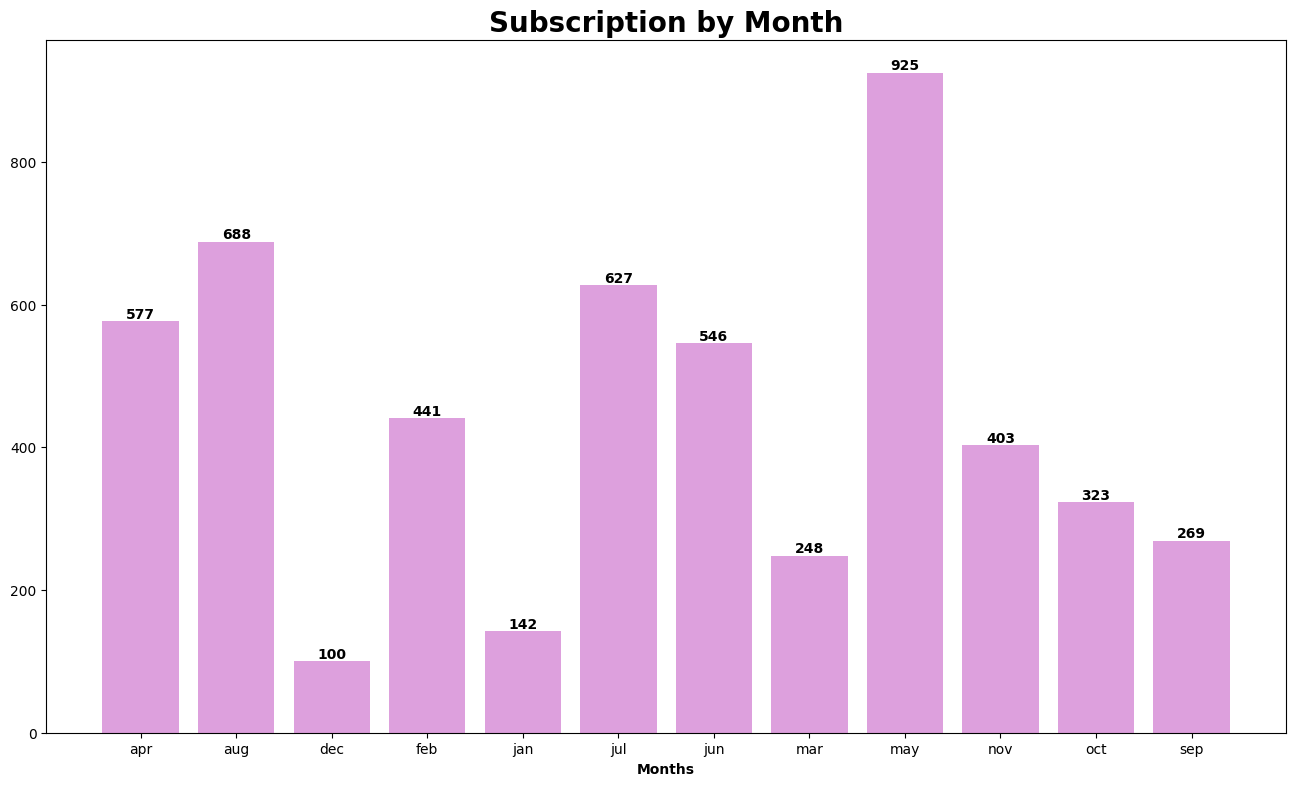

In [25]:
A = df[df['y']=='yes']
B = A.groupby('month', as_index = False)['y'].count()
x = B['month']
y = B['y']
fig = plt.figure(figsize = (16,9))
g = plt.bar(x, y, color = 'plum')
plt.title('Subscription by Month',fontsize=20,fontweight = "bold")
plt.xlabel('Months',fontweight = "bold")
plt.bar_label(g,fontweight = "bold")
plt.show()

### **8. Is there an optimal number of contacts for a client to maximize subscription likelihood?**

In [26]:
df['contact'].nunique()

3

### **9. How does having a credit in default affect the likelihood of subscribing?**

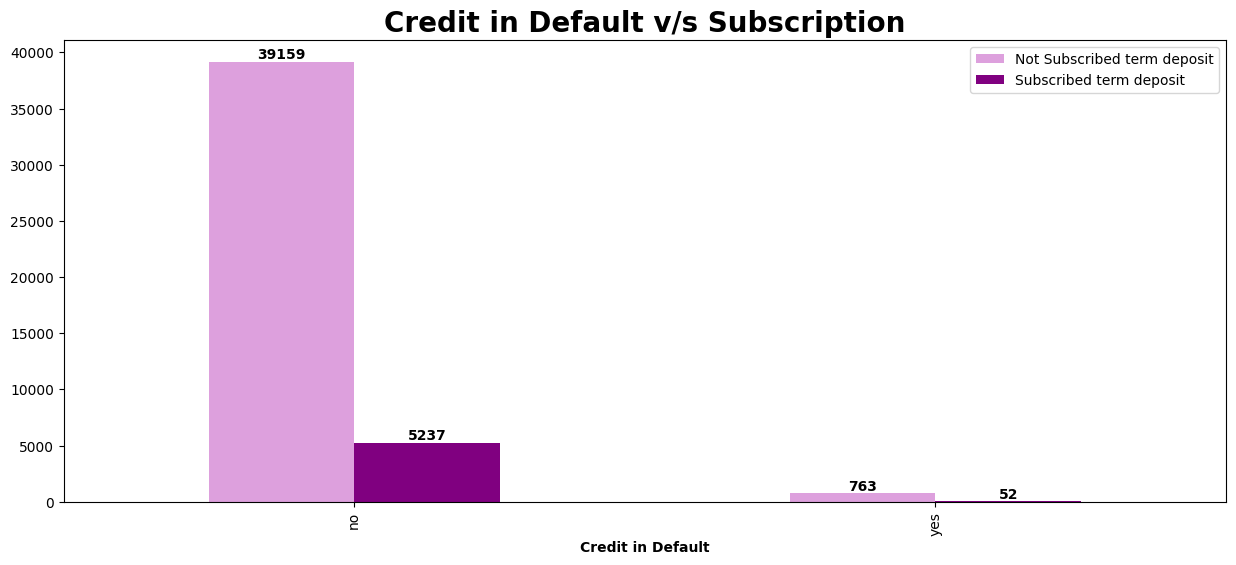

In [27]:
h = pd.crosstab(df.default,df.y).plot(kind="bar",figsize=(15,6),color=['plum','purple' ])
plt.title('Credit in Default v/s Subscription',fontsize=20,fontweight = "bold")
plt.xlabel('Credit in Default',fontweight = "bold")
plt.legend(['Not Subscribed term deposit','Subscribed term deposit'])
plt.bar_label(h.containers[0],fontweight = "bold")
plt.bar_label(h.containers[1],fontweight = "bold")
plt.show()

### **10. Does the duration of the last contact have an impact on the subscription?**

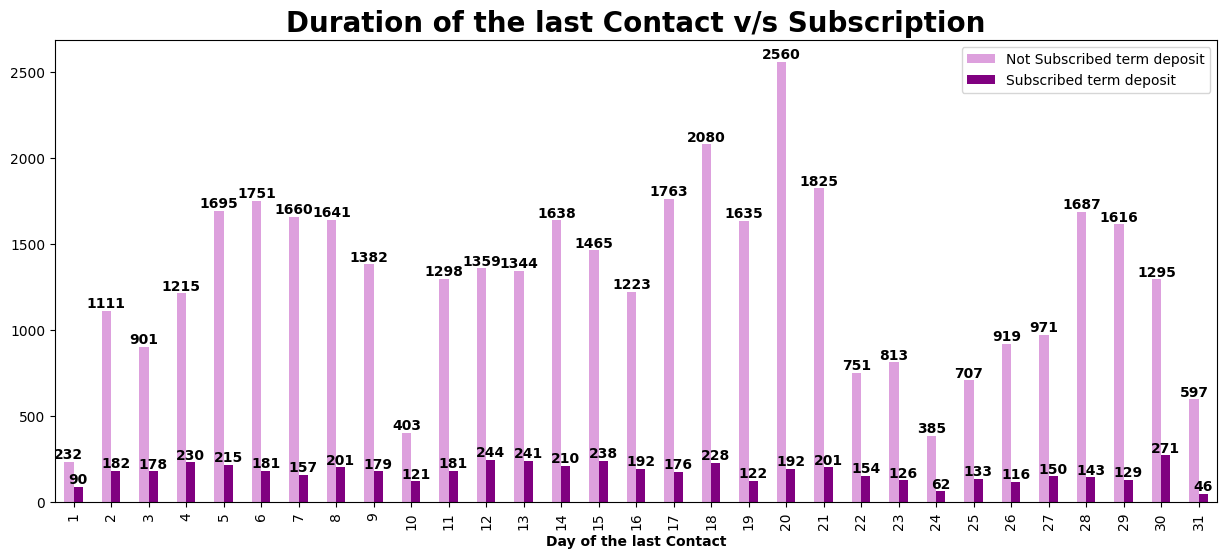

In [28]:
i = pd.crosstab(df.day,df.y).plot(kind="bar",figsize=(15,6),color=['plum','purple' ])
plt.title('Duration of the last Contact v/s Subscription',fontsize=20,fontweight = "bold")
plt.xlabel('Day of the last Contact',fontweight = "bold")
plt.legend(['Not Subscribed term deposit','Subscribed term deposit'])
plt.bar_label(i.containers[0],fontweight = "bold")
plt.bar_label(i.containers[1],fontweight = "bold")
plt.show()

### **11. Which combination of job type and education level has the highest subscription rate?**

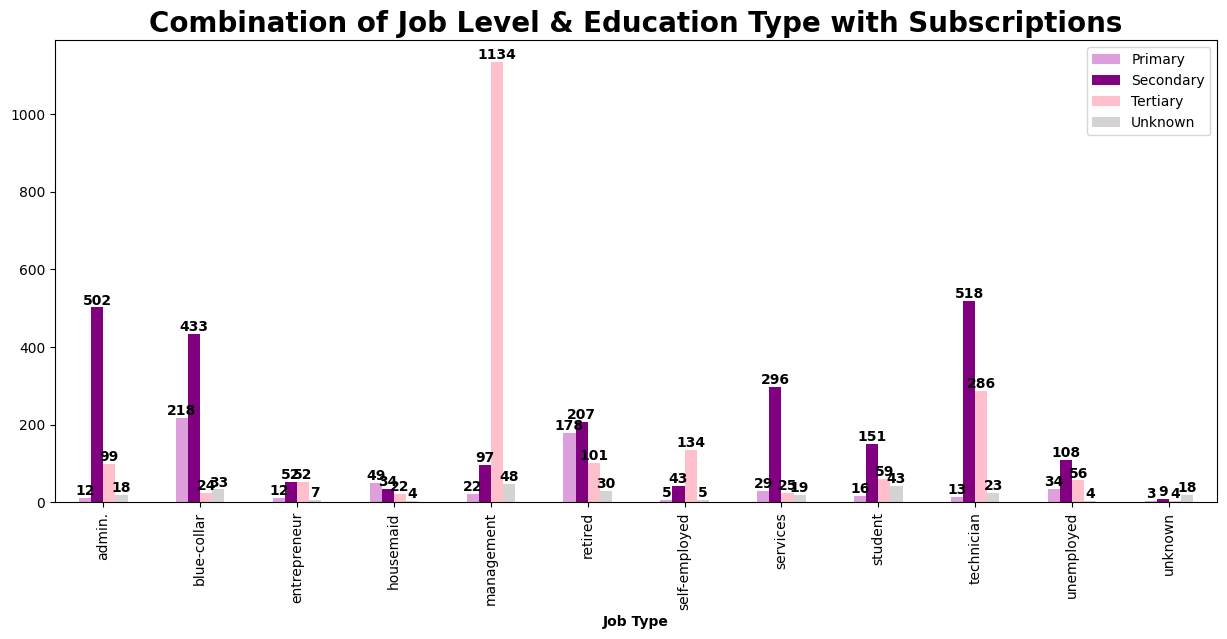

In [29]:
X = df[df['y']=='yes']
j = pd.crosstab(X['job'],[X['education'],X['y']]).plot(kind="bar",figsize=(15,6),
                                                   color=['plum','purple','pink','lightgrey'])
plt.title('Combination of Job Level & Education Type with Subscriptions',fontsize=20,
          fontweight = "bold")
plt.legend(['Primary','Secondary','Tertiary','Unknown'])
plt.xlabel('Job Type',fontweight = "bold")
plt.bar_label(j.containers[0],fontweight = "bold")
plt.bar_label(j.containers[1],fontweight = "bold")
plt.bar_label(j.containers[2],fontweight = "bold")
plt.bar_label(j.containers[3],fontweight = "bold")
plt.show()

### **12. Does the success rate increase if a client is contacted more than once in previous campaigns?**

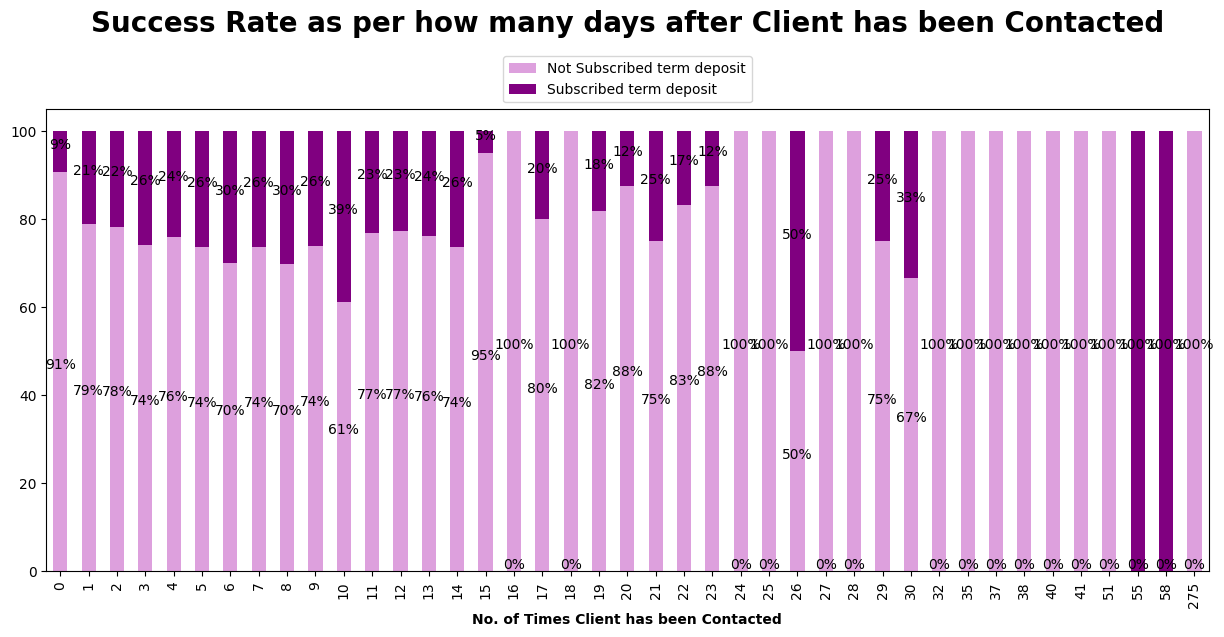

In [30]:
Z= pd.crosstab(df.previous,df.y,normalize = 'index').round(41)*100
k = Z.plot(kind="bar",figsize=(15,6),color=['plum','purple' ],stacked = True)
plt.title('Success Rate as per how many days after Client has been Contacted',
          fontsize=20,fontweight = "bold",y=1.15)
plt.xlabel('No. of Times Client has been Contacted',fontweight = "bold")
plt.legend(['Not Subscribed term deposit','Subscribed term deposit'],
           loc='upper center', bbox_to_anchor=(0.5, 1.13))
for rec in k.patches:
    height = rec.get_height()
    k.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

### **13. Can economic indicators (like balance) be used to segment clients for targeted marketing?**

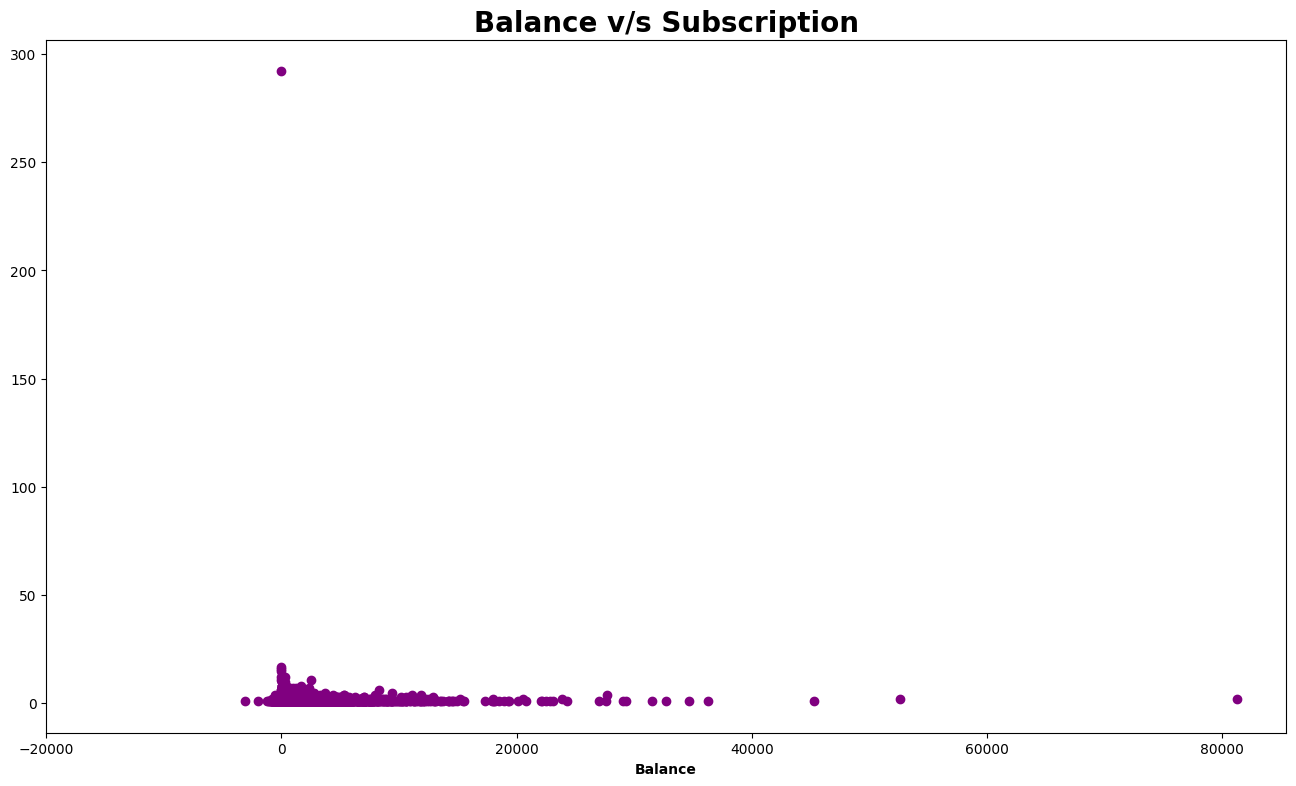

In [31]:
X = df[df['y']=='yes']
Y = X.groupby('balance', as_index = False)['y'].count()
x = Y['balance']
y = Y['y']
fig = plt.figure(figsize = (16,9))
plt.scatter(x, y, color = 'purple')
plt.xticks([-20000,0,20000,40000,60000,80000])
plt.title('Balance v/s Subscription',fontsize=20,fontweight = "bold")
plt.xlabel('Balance',fontweight = "bold")
plt.show()

### **14. Is there a specific duration range of contact that leads to the highest success rates?**

In [32]:
X = df[df['y']=='yes']
X.loc[X['duration'] <= 999,'duration range'] = '0-999'
X.loc[(X['duration'] > 999) & (X['duration'] <= 1999),'duration range'] = '1000-1999'
X.loc[(X['duration'] > 1999) & (X['duration'] <= 2999),'duration range'] = '2000-2999'
X.loc[(X['duration'] > 2999) & (X['duration'] <= 3999),'duration range'] = '3000-3999'
X.loc[X['duration'] > 3999 ,'duration range'] = '4000 and above'
X.groupby('duration range',as_index = False)['y'].count()

/tmp/ipykernel_18/1116202903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X['duration'] <= 999,'duration range'] = '0-999'


,duration range,y
0,0-999,4653
1,1000-1999,606
2,2000-2999,24
3,3000-3999,6


### **15. Can we create a comprehensive profile of an "ideal" client most likely to subscribe based on the data?**

In [33]:
X = df[df['y']=='yes']
X.loc[(X['age'] >17) & (X['age'] <= 27), 'age range'] = '18-27'
X.loc[(X['age'] >27) & (X['age'] <= 37), 'age range'] = '28-37'
X.loc[(X['age'] >37) & (X['age'] <= 47), 'age range'] = '38-47'
X.loc[(X['age'] >47) & (X['age'] <= 57), 'age range'] = '48-57'
X.loc[(X['age'] >57) & (X['age'] <= 67), 'age range'] = '58-67'
X.loc[(X['age'] >67) & (X['age'] <= 77), 'age range'] = '68-77'
X.loc[(X['age'] >77) & (X['age'] <= 87), 'age range'] = '78-87'
X.loc[(X['age'] >87) & (X['age'] <= 100), 'age range'] = '88-100'
X.groupby('age range', as_index= False)['y'].count()

/tmp/ipykernel_18/2200543707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[(X['age'] >17) & (X['age'] <= 27), 'age range'] = '18-27'


,age range,y
0,18-27,595
1,28-37,1959
2,38-47,1167
3,48-57,808
4,58-67,487
5,68-77,194
6,78-87,72
7,88-100,7


In [34]:
X.groupby('job', as_index= False)['y'].count()

,job,y
0,admin.,631
1,blue-collar,708
2,entrepreneur,123
3,housemaid,109
4,management,1301
5,retired,516
6,self-employed,187
7,services,369
8,student,269
9,technician,840


In [35]:
X.groupby('marital', as_index= False)['y'].count()

,marital,y
0,divorced,622
1,married,2755
2,single,1912


In [36]:
X.groupby('education', as_index= False)['y'].count()

,education,y
0,primary,591
1,secondary,2450
2,tertiary,1996
3,unknown,252


# **Conclusion**

* Maximum number of clients are within age range 30-40.
* Clients most likely to subscribe term deposit in month of May.
* Duration range of contact that leads to the highest success rates is 0-999 secs.
* Profile of an ideal client most likely to subscribe term deposit looks like:
  * age range: 38-47
  * job profile: management
  * marital status: married
  * education type: secondary

<img src = "https://t4.ftcdn.net/jpg/03/29/44/25/360_F_329442520_bs9DE1vhchdtXtbsJXcwGQTpjZd5NzDo.jpg">